# Lead Scoring Case Study

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [6]:
# Read the data from the CSV file into a DataFrame
leads = pd.read_csv("Leads.csv")

In [11]:
#Get the shape (row and column count of the data)
leads.shape

(9240, 37)

In [12]:
#Check the info 
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [13]:
#Checking the sample values using df.head()
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [14]:
#Use describe() to check for the numerical data
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [15]:
#Checking for null values in the data
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [19]:
# Check the null percentages of the individual columns.
leads_null=round((leads.isnull().sum())/len(leads.index) * 100,2)
print(leads_null[leads_null > 0])

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     29.32
City                                             15.37
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
dtype: float64


In [20]:
# Removing columns with constant values and Prospect_ID 
leads = leads.drop('Prospect ID', axis=1)
leads = leads.drop('Magazine', axis=1)
leads = leads.drop('Receive More Updates About Our Courses', axis=1)
leads = leads.drop('Update me on Supply Chain Content', axis=1)
leads = leads.drop('Get updates on DM Content', axis=1)
leads = leads.drop('I agree to pay the amount through cheque', axis=1)

In [21]:
#Checking if the columns are removed using shape (6 colummns removed)
leads.shape

(9240, 31)

In [22]:
# Replacing "Select" as NONE 
leads = leads.replace('Select', None)

In [23]:
#Checking for the changes
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,Interested in other courses,Low in Relevance,None,None,02.Medium,02.Medium,15.0,15.0,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,Ringing,NaN,None,None,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,Ringing,Not Sure,None,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,Will revert after reading the email,Might be,None,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [25]:
# Plot style 
sns.set(style="whitegrid")

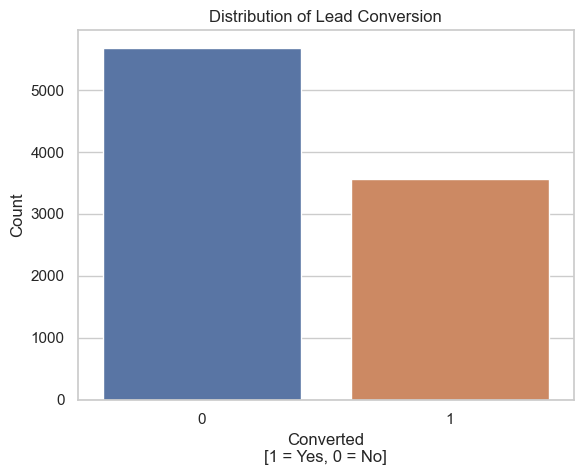

In [35]:
# Target variable distribution 
plt.figure()
sns.countplot(x='Converted', data=leads)
plt.title("Distribution of Lead Conversion")
plt.xlabel("Converted\n[1 = Yes, 0 = No]")
plt.ylabel("Count")
plt.show()

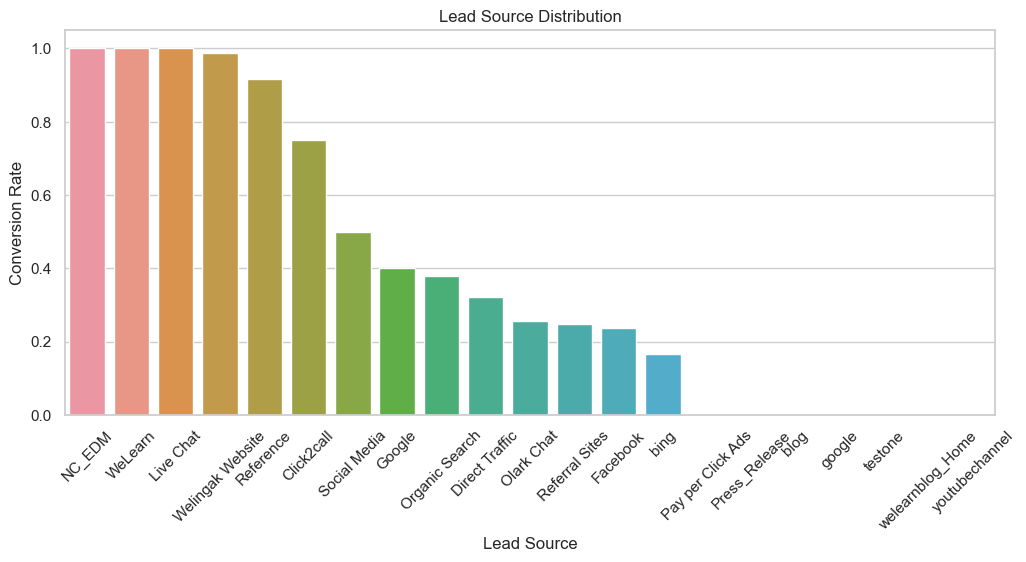

In [42]:
# Lead Source Distribution
plt.figure(figsize=(12,5))
conversion_bysource = leads.groupby('Lead Source')['Converted'].mean().sort_values(ascending=False)
sns.barplot(x=conversion_bysource.index, y=conversion_bysource.values)
plt.title("Lead Source Distribution")
plt.xlabel("Lead Source")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.show()

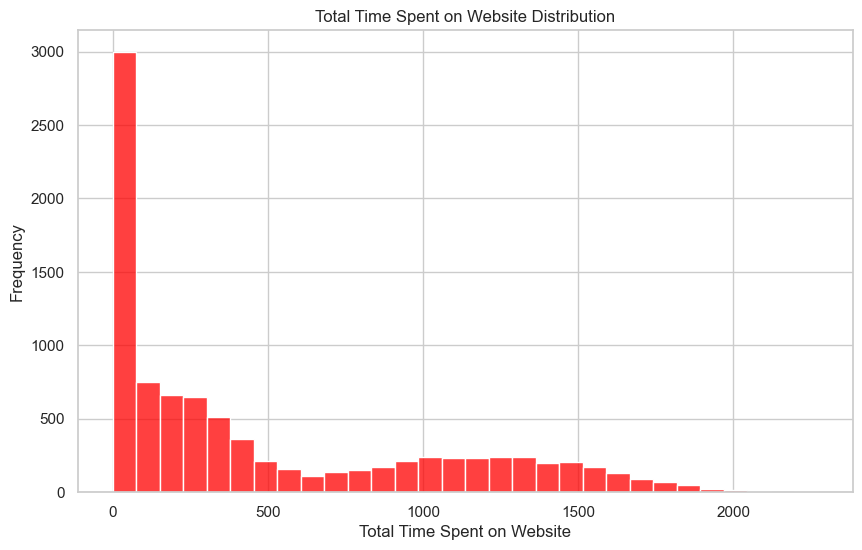

In [45]:
#Total Time Spent on Website
plt.figure(figsize=(10, 6))
sns.histplot(leads['Total Time Spent on Website'], color='red', bins=30)
plt.title("Total Time Spent on Website Distribution")
plt.xlabel("Total Time Spent on Website")
plt.ylabel("Frequency")
plt.show()


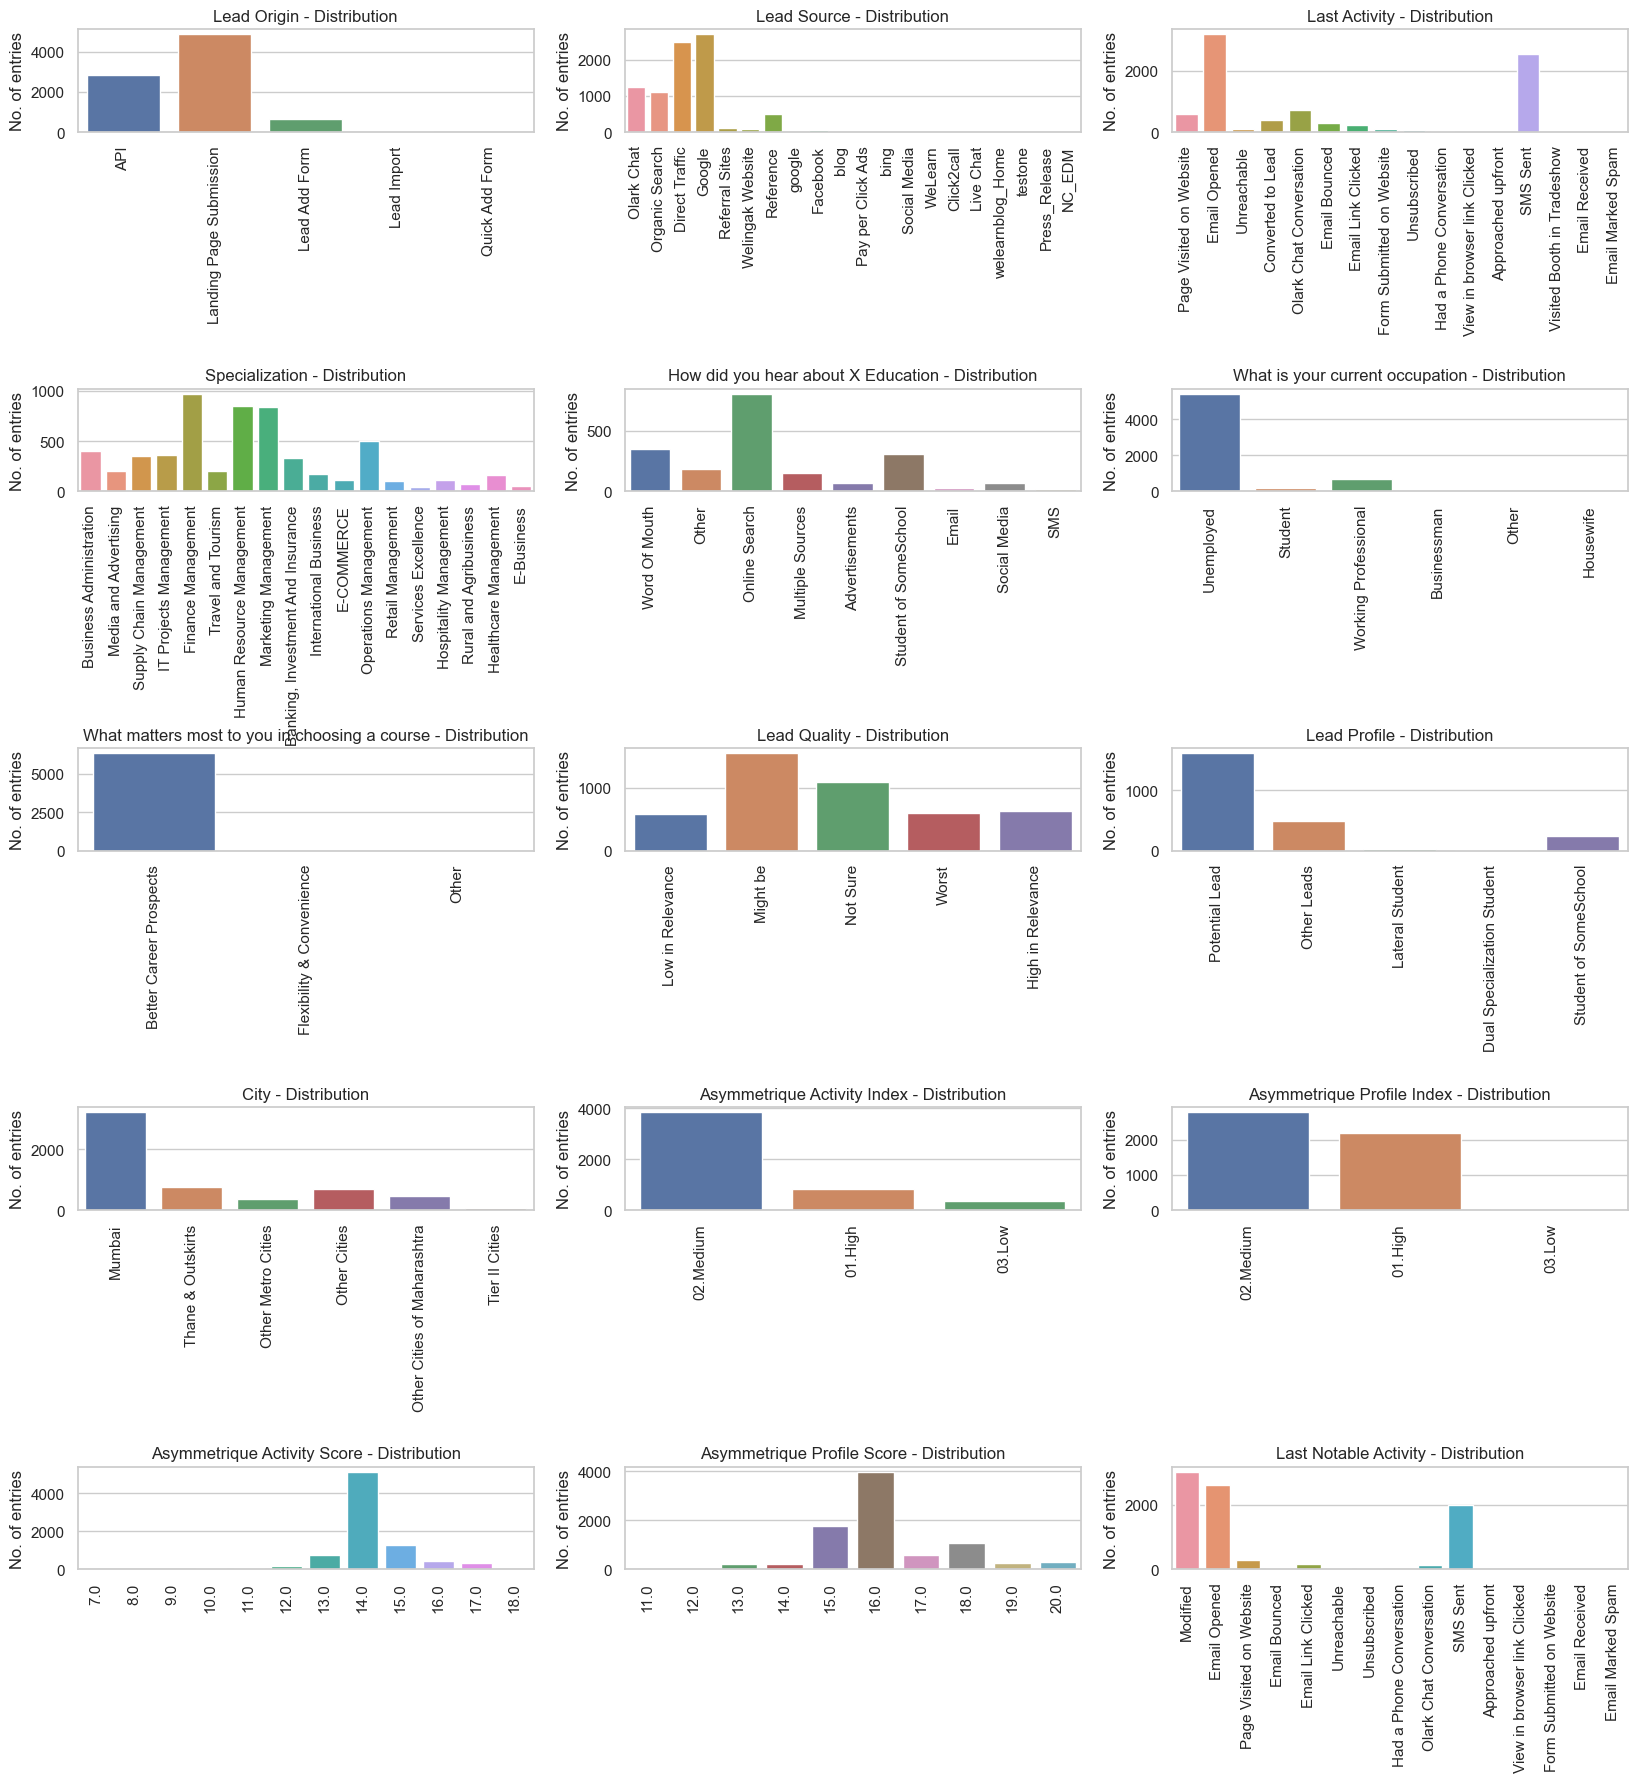

In [77]:
#Univariate Analysis
# Checking the distribution of Categorical variables 
col_list_for_count=['Lead Origin','Lead Source','Last Activity','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Last Notable Activity']
sns.set(style="whitegrid")

# Visualising the histogram of the distribution of all categorical variables
plt.figure(figsize=(20,20))
for i in range(len(col_list_for_count)):
    plt.subplot(5, 3, i+1)
    var=col_list_for_count[i]
    sns.countplot(x=var, data=leads)
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 2.5)

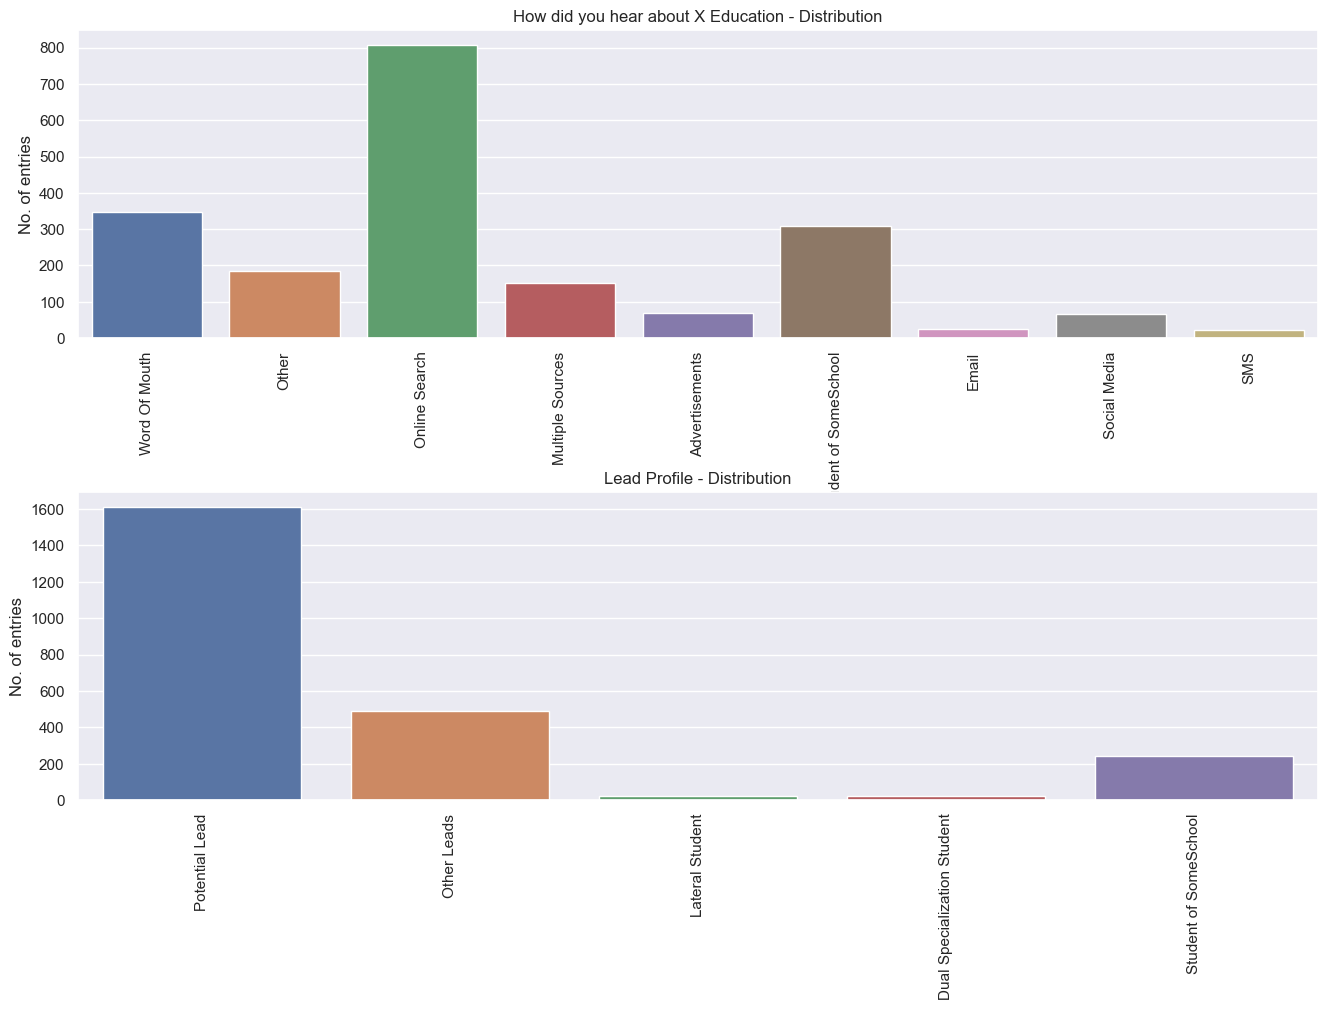

In [84]:
#Bivariate Analysis
# Checking the variables with NULL values
col_list_for_count3=['How did you hear about X Education','Lead Profile']
sns.set(style="darkgrid")

# Visualising the histogram of these two categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_list_for_count3)):
    plt.subplot(3, 1, i+1)
    var=col_list_for_count3[i]
    sns.countplot(x= var, data = leads)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 0.5)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values